# Comparing Images Using Image Historgrams

In this workbook i experiment with comparing images using their histrograms. The metrics for comparison are Chi-Squared and Kullback-Leibler Divergence. As will be shown. the comparison metric used for historgram similarity can significantly influence which images are classified as similar or not. 2 different metrics will not neccessarily indicate that the same 2 images are similar.

Import the OpenCV & Numpy Libraries

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread('./resources/img1.jpg')
img2 = cv.imread('./resources/img2.jpg')
img3 = cv.imread('./resources/img3.jpg')

## 1.Calculating and Plotting Histrograms
Convert the images to grayscale

In [2]:
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img3_gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

The calcHist() function calculates the historgram.

In [3]:
hist1_gray = cv.calcHist([img1_gray],[0],None,[256],[0,256])
hist2_gray = cv.calcHist([img2_gray],[0],None,[256],[0,256])
hist3_gray = cv.calcHist([img3_gray],[0],None,[256],[0,256])

Plot & save the historgrams

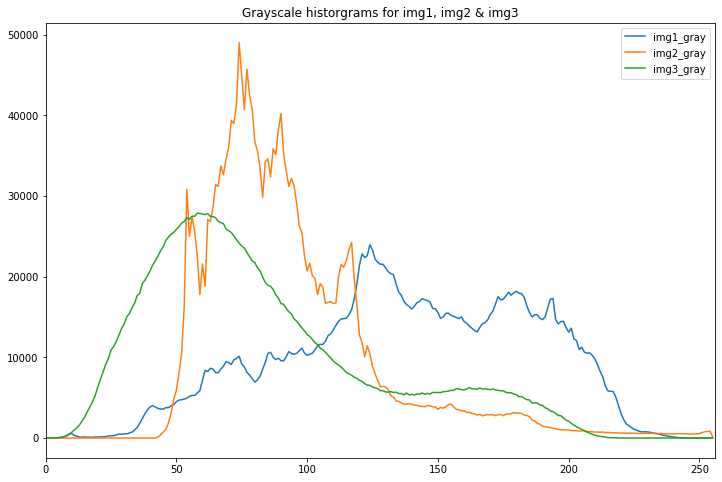

In [4]:
plt.figure(figsize=(12,8))
plt.plot(hist1_gray, label = 'img1_gray')
plt.plot(hist2_gray, label = 'img2_gray')
plt.plot(hist3_gray, label = 'img3_gray')
plt.legend(loc="upper right")
plt.xlim([0,256])
plt.title('Grayscale historgrams for img1, img2 & img3')
plt.savefig('image-historgrams.png')

## 2. Comparing the Image using Historgrams metrics

Defines the functions for Chi-squared and Kullback-Leibler metrics. 

In [5]:
def ChiSquaredDist(hist1, hist2):
    """ Calculates the chi-squared distance between 2 histograms"""
    return np.sum(((hist1 - hist2)**2) / (hist1 + hist2))

def KlDivergence(hist1, hist2):
    """ Calculates the Kullback-Leibler Divergence between 2 histograms"""
    return np.sum(hist1 * np.log(hist1 / hist2))

def KlDist(hist1, hist2):
    """ Calculates the Kullback-Leibler Distance between 2 histograms"""
    kl1 = KlDivergence(hist1, hist2)
    kl2 = KlDivergence(hist2, hist1)
    return kl1 + kl2

Add small value to each element in array to prevent divide by zero errors

In [6]:
hist1_gray = hist1_gray + 0.00001
hist2_gray = hist2_gray + 0.00001
hist3_gray = hist3_gray + 0.00001

## Chi-squared Comparison
Test similarities between image historgrams using self defined chi-squared metric

In [7]:
print(f"""
    ------------ x2 Distances ------------
    x2 Distance between img1 and img2: {ChiSquaredDist(hist1_gray, hist2_gray):.2f}
    x2 Distance between img1 and img3: {ChiSquaredDist(hist1_gray, hist3_gray):.2f}
    x2 Distance between img2 and img3: {ChiSquaredDist(hist2_gray, hist3_gray):.2f}
""")


    ------------ x2 Distances ------------
    x2 Distance between img1 and img2: 1567298.00
    x2 Distance between img1 and img3: 1434813.25
    x2 Distance between img2 and img3: 837586.81



Chi-squared value closer to 0 indicates closeness/similarity with 0.0 being a perfect match. Therefore, according to chi-square, img2 and img3 are most similar with a value of 837586.81

## Kullback-Leibler Divergence
Normalize the historgrams before applying KL calculations

In [8]:
hist1_gray_norm = (hist1_gray) / np.sum(hist1_gray)
hist2_gray_norm = (hist2_gray) / np.sum(hist2_gray)
hist3_gray_norm = (hist3_gray) / np.sum(hist3_gray)

Test similarities between image historgrams using self defined Kullback-Leibler metric

In [9]:
print(f"""
    ------------ Kullback-Leibler Divergence  - Self Defined ------------
    Kullback-Leibler Divergence between img1 and img2: {KlDist(hist1_gray_norm, hist2_gray_norm):.2f}
    Kullback-Leibler Divergence between img1 and img3: {KlDist(hist1_gray_norm, hist3_gray_norm):.2f}
    Kullback-Leibler Divergence between img2 and img3: {KlDist(hist2_gray_norm, hist3_gray_norm):.2f}
""")


    ------------ Kullback-Leibler Divergence  - Self Defined ------------
    Kullback-Leibler Divergence between img1 and img2: 1.92
    Kullback-Leibler Divergence between img1 and img3: 1.72
    Kullback-Leibler Divergence between img2 and img3: 3.83



The Kullback-Leibler distance test produced the results in table 2. A lower KL value indicates closeness/similarity with 0.0 being a perfect match. As KL divergence is not symmetric, we can do the calculation for KL(h1,h2)+KL(h2,h1). Therefore, according to KL divergence, img1 and im3 are most similar with a value of 1.72.